# 2021 vs 2022 Xarray User Survey Results

This notebook presents the results of the 2021 and 2022 Xarray User Surveys. Thanks to everyone who took the time to fill out the survey! These results help us better understand the Xarray community and will guide future development efforts.

The raw data, as well as this notebook, can be found in this binder:

[badge...]()

Let us know if you find anything in the data.

## Highlights


- more
- highlights
- here

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import textwrap

In [2]:
def load_data(files):
    dfs = []
    for file in files:
        _df = pd.read_csv(file)
        _df['year'] = int(file.split('-')[0])
        dfs.append(_df)
        
    df = pd.concat(dfs).set_index('year')
    
    return df
    
df = load_data(files=['2021-01.csv', '2022-06.csv'])
df.head()

,Timestamp,What is the job title that best describes your role when using Xarray?,What field do you work in?,How did you hear about this survey?,How often do you use Xarray?,How many years have you been using Xarray?,How do you rate your level of Xarray proficiency?,"For your applications that use Xarray, how critical is Xarray?",Is Xarray stable enough for you?,What Xarray resources have you used for support in the last six months?,...,Xarray supports multiple backend array types (e.g. NumPy and Dask). Rank your interest non-NumPy backend array support: [Pint (unit-aware) arrays],Xarray supports multiple backend array types (e.g. NumPy and Dask). Rank your interest non-NumPy backend array support: [Other],"If you answered ""Other"" above, list any additional array types:",Xarray's documentation is due for a makeover. Rank the following set of possible changes based on your personal preferences: [Rewrite introductory material to be more generic (less focused on NetCDF and geoscience applications)],Xarray's documentation is due for a makeover. Rank the following set of possible changes based on your personal preferences: [A more modern web design],Xarray's documentation is due for a makeover. Rank the following set of possible changes based on your personal preferences: [Expanded set of domain-specific interactive tutorials],Xarray's documentation is due for a makeover. Rank the following set of possible changes based on your personal preferences: [Expanded set of generic examples for common workflow patterns],Unnamed: 58,Unnamed: 59,"What common feature requests do you care about most? [New data structures (e.g. lightweight labeled array, tree-like dataset)]"
year,,,,,,,,,,,,,,,,,,,,,
2021,1/6/2021 8:02:26,"Domain scientist / researcher, Data scientist,...",Geosciences,Friend,Most days,7.0,4.0,4.0,Yes (and I wouldn't mind a little less stabili...,"Documentation (http://xarray.pydata.org/), Git...",...,Somewhat interested,NaN,NaN,2,1 (highest priority),4 (lowest priority),3,NaN,NaN,NaN
2021,1/6/2021 8:19:36,Student,Geosciences,Twitter,Most days,2.0,2.0,2.0,Yes,"Documentation (http://xarray.pydata.org/), Tut...",...,Not interested,NaN,NaN,4 (lowest priority),3,1 (highest priority),2,NaN,NaN,NaN
2021,1/6/2021 8:21:42,Domain scientist / researcher,Geosciences,Twitter,Occasionally (~monthly),2.0,1.0,0.0,No,"Documentation (http://xarray.pydata.org/), Tut...",...,Not interested,Not interested,NaN,4 (lowest priority),2,3,1 (highest priority),NaN,NaN,NaN
2021,1/6/2021 8:22:18,"Student, Data scientist",Geosciences,Twitter,Most days,1.0,3.0,4.0,No,"Documentation (http://xarray.pydata.org/), Sta...",...,NaN,NaN,NaN,NaN,1 (highest priority),NaN,NaN,NaN,NaN,NaN
2021,1/6/2021 8:23:57,"Domain scientist / researcher, Software engine...",Geosciences,Twitter,Most days,4.0,3.0,4.0,Yes,"Documentation (http://xarray.pydata.org/), Sta...",...,Very interested,Somewhat interested,Video frames,4 (lowest priority),3,2,1 (highest priority),NaN,NaN,NaN


In [3]:
def split_entries(series):
    split = series.str.split(", ", expand=True)
    stacked = split.stack()
    return stacked.droplevel(level=1)

## role and job title

Multiple choices are possible.

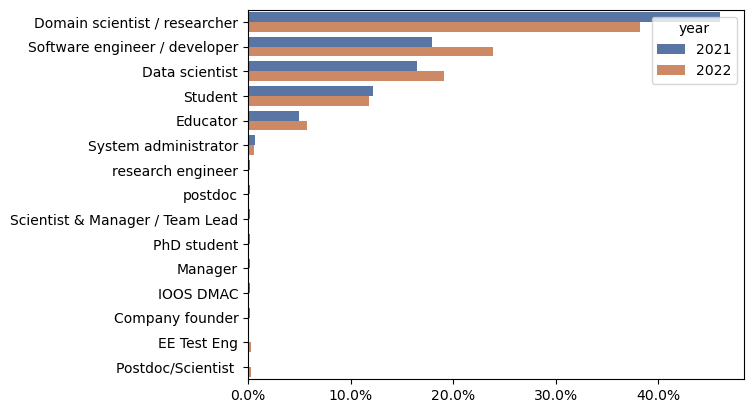

In [4]:
col = 'What is the job title that best describes your role when using Xarray?'
data = df[col]

prepared = split_entries(data)
counts = prepared.to_frame(name="roles").groupby('year').value_counts(normalize=True).mul(100)
filtered = counts[counts > 0].reset_index(name="counts")

ax = sns.barplot(y="roles", x="counts", data=filtered, palette="deep", hue='year', )
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
_ = ax.set_xlabel(None)
_ = ax.set_ylabel(None)

## field of work

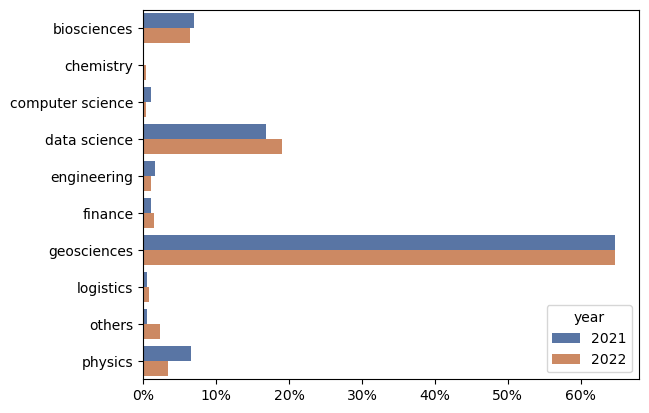

In [5]:
data = df['What field do you work in?']
categories = {
    "physics": (
        "astrophysics",
        "physics",
        "fluid mechanic",
        "fluid mechanics",
        "turbulence",
        "plasma physics",
        "thermodynamics",
        "material science",
        "materials science",
        "optical fluid flow measurements",
        "medical physics",
        "microscopy",
    ),
    "geosciences": (
        "geosciences",
        "climate science and meteorology",
        "meteorology",
        "climate science",
        "earth sciences",
        "oceanography",
        "climatology",
        "weather & climate",
        "atmospheric science",
        "atmospheric sciences",
        "atmospheric sciences/meteorology",
        "biogeochemistry",
        "agrometeorology",
        "remote sensing",
        "ocean engineering",
        "remote sensing / biology",
        "computational hydrology",
        "oceanography and ocean modeling",
        "climate modeling",
        "satellite imagery processing",
    ),
    "data science": ("statistics", "statistics & machine learning", "mathematics"),
    "biosciences": ("biosciences", "neuroscience", "biomedical engineering"),
    "computer science": (
        "computing",
        "semiconductors",
        "electrical engineering",
        "electrical & computer engineering",
    ),
    "engineering": ("civil engineering", "energy", "renewable energy", "wind energy", "welding engineering", "ee", "telecommunications"),
    "logistics": ("logistics", "air traffic management research", "planning and simulation", "hydropower optimization"),
    "others": ("sports analytics", "political science", "consulting", "multi-disciplinary research and monitoring", "psychology", 
               "hyperspectral imaging", "communications", "agriculture"),
}
def categorize(data, categories):
    data = data.lower().strip()
    for category, fields in categories.items():
        if data in fields:
            return category
    return data

split = split_entries(data)
categorized = split.map(lambda data: categorize(data, categories)).astype("category")
counts = categorized.groupby('year').value_counts(normalize=True).mul(100)
filtered = counts[counts > 0].to_frame(name="counts")

ax = sns.barplot(x="counts", y="level_1", data=filtered.reset_index(), palette="deep", hue='year')
_ = ax.set_xlabel(None)
_ = ax.set_ylabel(None)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# TODO: while interesting use cases, there are a few with very few answers

## use of xarray

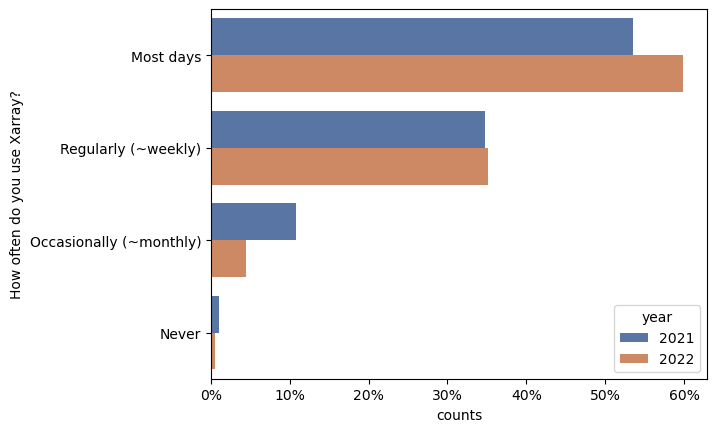

In [6]:
data = df['How often do you use Xarray?'].groupby('year').value_counts(normalize=True).mul(100).reset_index(name='counts')

ax = sns.barplot(x='counts', y='How often do you use Xarray?', data=data, palette="deep", hue='year')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

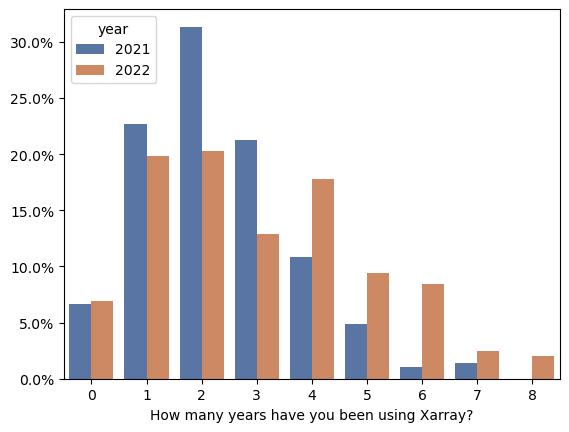

In [7]:
data = df['How many years have you been using Xarray?']

cleaned = data.dropna().astype(int)
counts = cleaned.groupby('year').value_counts(normalize=True).mul(100).sort_index()

prepared = counts.reset_index(name='counts')
ax = sns.barplot(y="counts", x="How many years have you been using Xarray?", data=prepared, palette='deep', hue='year')
_ = ax.set_ylabel(None)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

## xarray proficiency

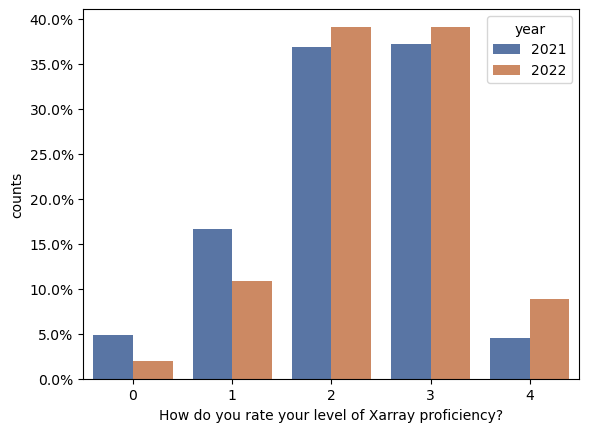

In [8]:
column = 'How do you rate your level of Xarray proficiency?'
data = df[column].dropna().astype(int).groupby('year').value_counts(normalize=True).mul(100).reset_index(name='counts')

ax = sns.barplot(y='counts', x=column, data=data, palette="deep", hue='year')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

## how critical is xarray?

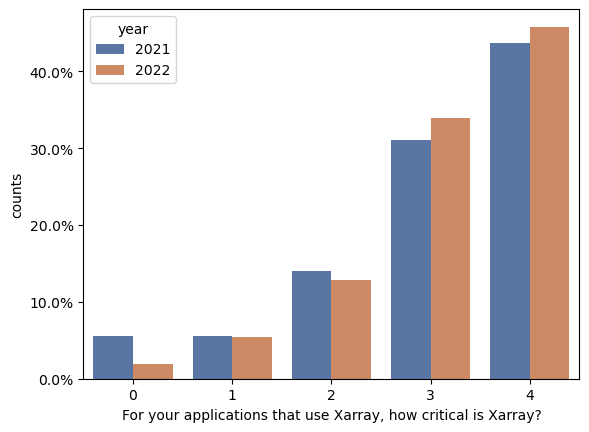

In [9]:
column = 'For your applications that use Xarray, how critical is Xarray?'
data = df[column].dropna().astype(int).groupby('year').value_counts(normalize=True).mul(100).reset_index(name='counts')

ax = sns.barplot(y='counts', x=column, data=data, palette="deep", hue='year')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

## is xarray stable enough?

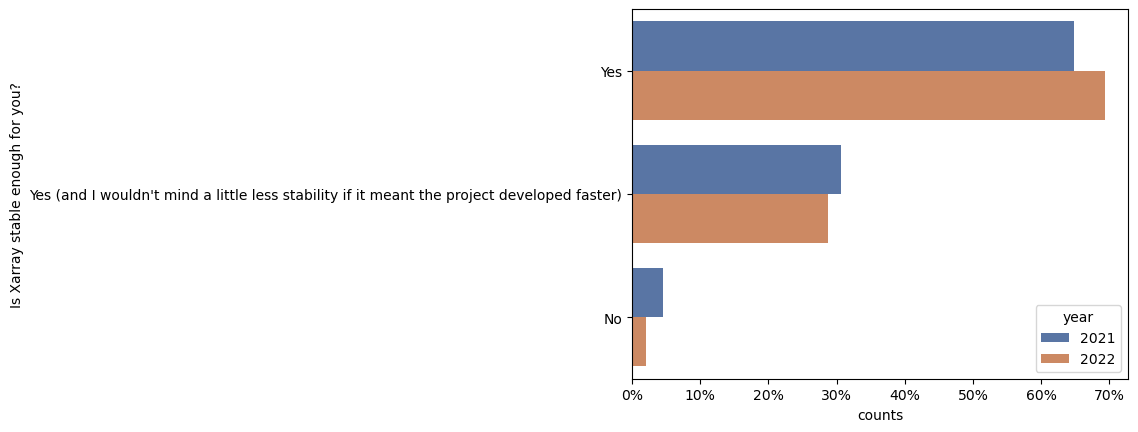

In [10]:
column = 'Is Xarray stable enough for you?'
data = df[column].dropna().groupby('year').value_counts(normalize=True).mul(100).reset_index(name='counts')

ax = sns.barplot(x='counts', y=column, data=data, palette="deep", hue='year')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

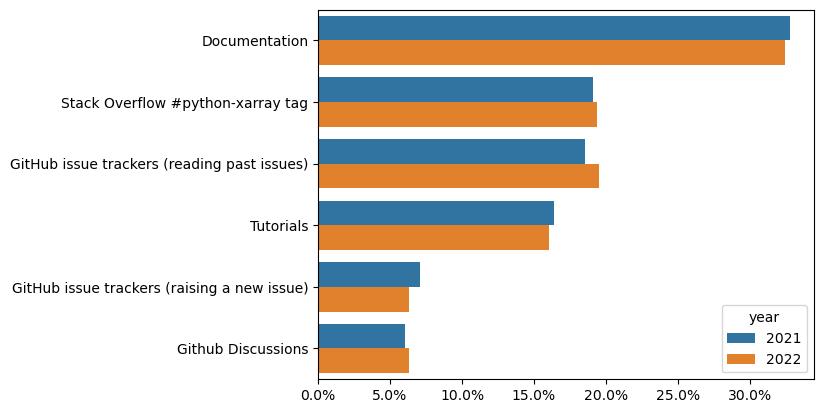

In [11]:
# TODO, split multiple entries, group like entries
column = 'What Xarray resources have you used for support in the last six months?'
data = df[column]
split = split_entries(data)
values = {'Tutorials (https://xarray-contrib.github.io/xarray-tutorial/)': 'Tutorials',
 'Tutorials (https://tutorial.xarray.dev)': 'Tutorials',
 'Documentation (http://xarray.pydata.org/)': 'Documentation',
 'Documentation (https://docs.xarray.dev/)': 'Documentation'}
split = split.replace(values)
split.name=column
counts = split.groupby('year').value_counts(normalize=True).mul(100).reset_index(name="counts")
ax = sns.barplot(x="counts", y=column, data=counts, hue='year')
_ = ax.set_xlabel(None)
_ = ax.set_ylabel(None)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

## most important xarray core features

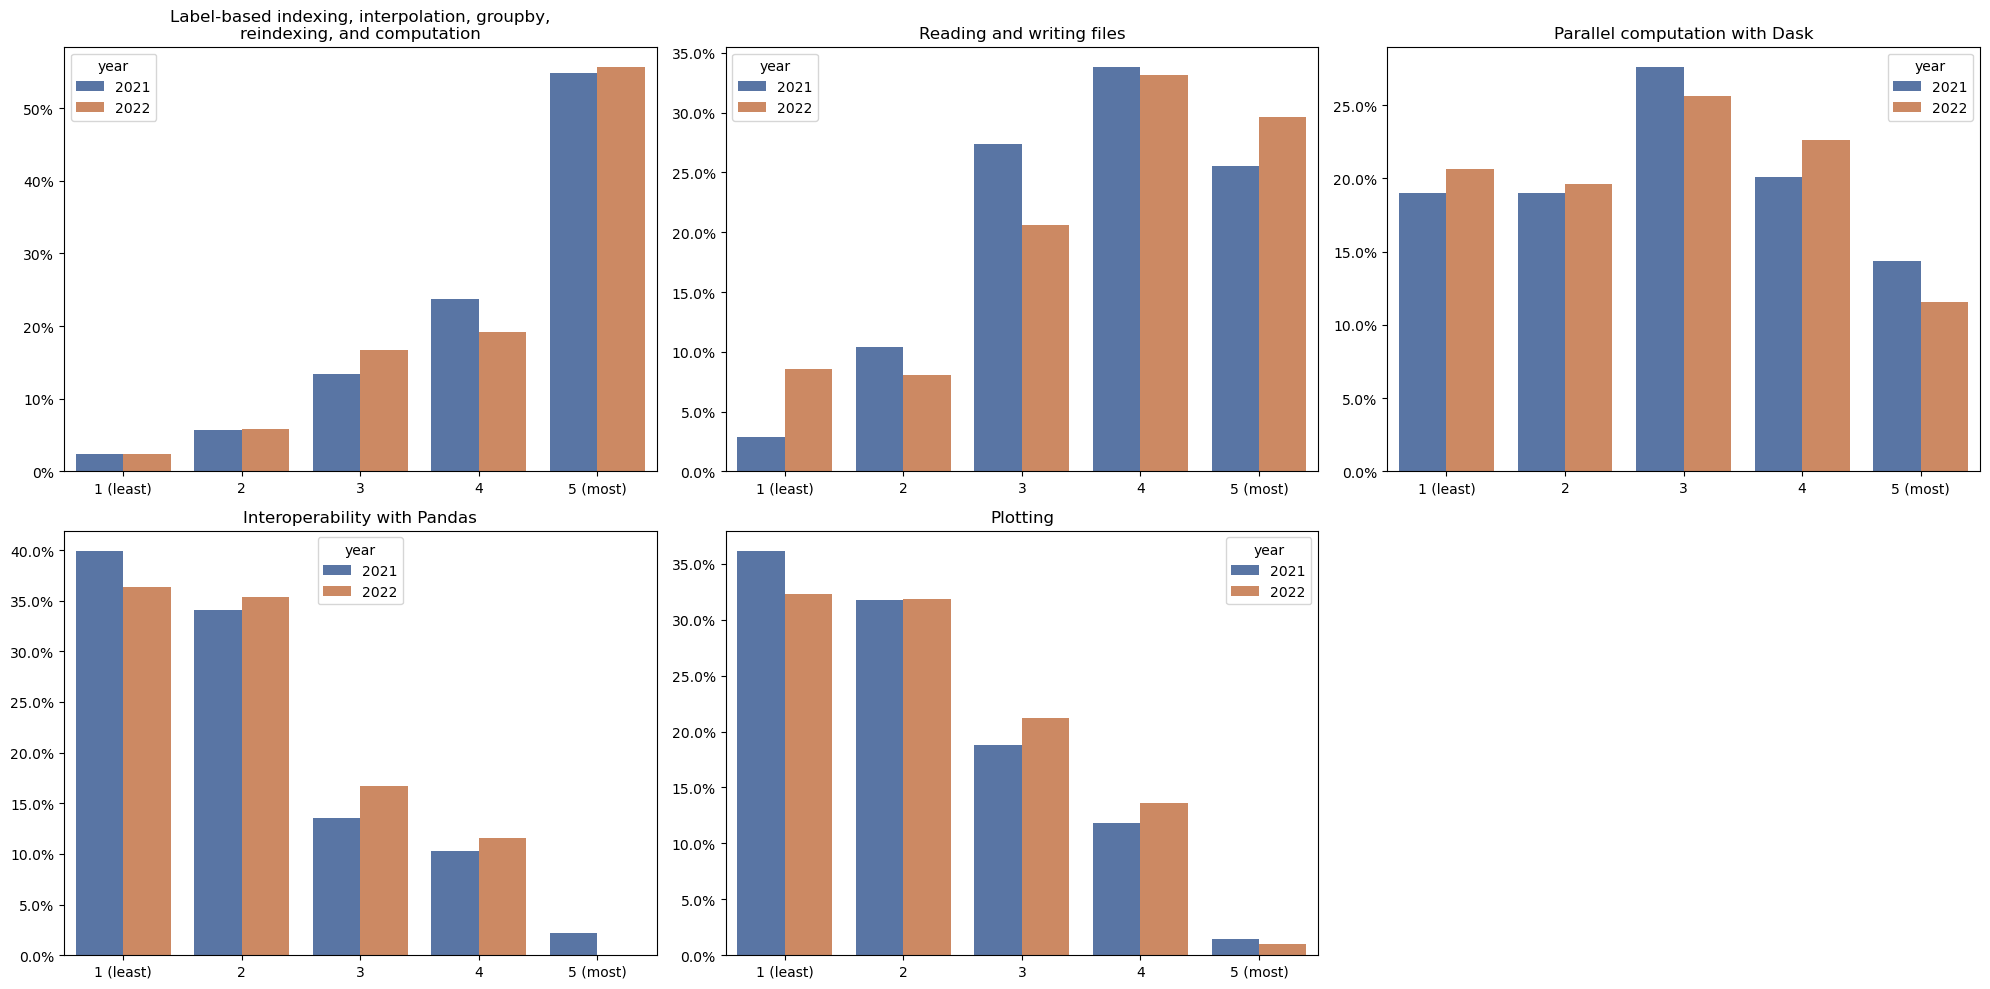

In [12]:
prefix = "Which of Xarray's core features are most important to you?"
df_q = df.filter(regex=f'^{prefix}',axis=1)
order = ['1 (least)', '2', '3', '4', '5 (most)']
column = prefix

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    data = s.groupby('year').value_counts(normalize=True).mul(100).reset_index(name='counts')

    sns.barplot(y='counts', x=k, data=data, palette="deep", hue='year', ax=ax, order=order)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[len(prefix):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
_ = axes[:][-1, -1].axis("off")
plt.tight_layout()

## hardware used to run xarray

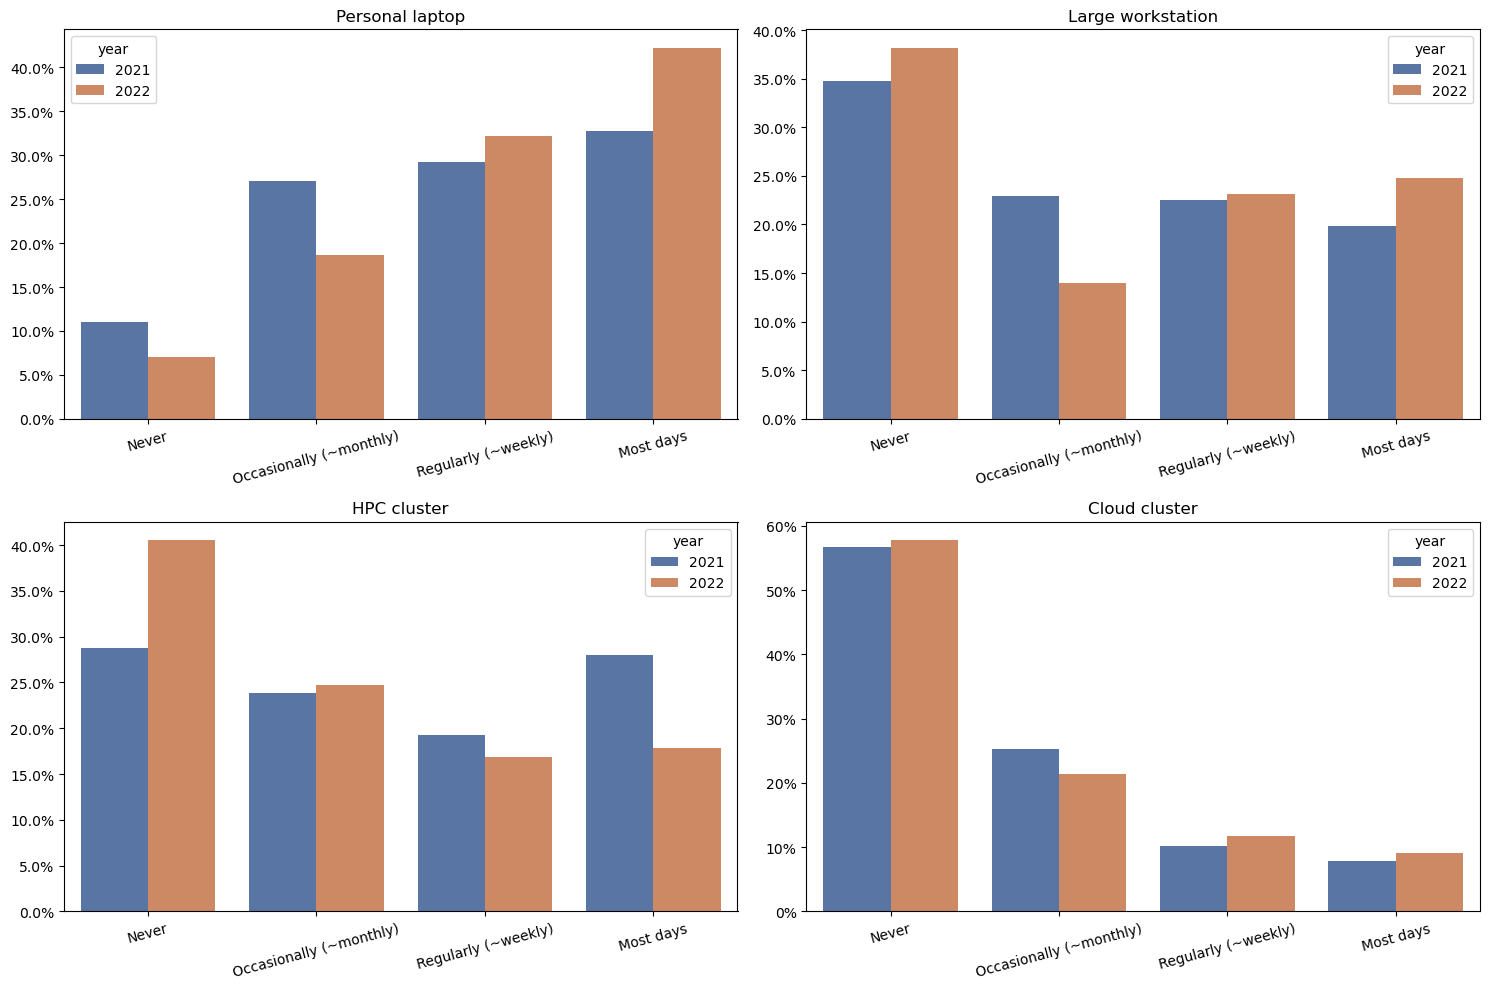

In [13]:
prefix = "Where do you use Xarray?"
order = ['Never', 'Occasionally (~monthly)', 'Regularly (~weekly)', 'Most days']

df_q = df.filter(regex=f'^{prefix}',axis=1)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    
    data = s.groupby('year').value_counts(normalize=True).mul(100).reset_index(name='counts')

    sns.barplot(y='counts', x=k, data=data, palette="deep", hue='year', ax=ax, order=order)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[len(prefix):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.tick_params(axis='x', rotation=15)
plt.tight_layout()

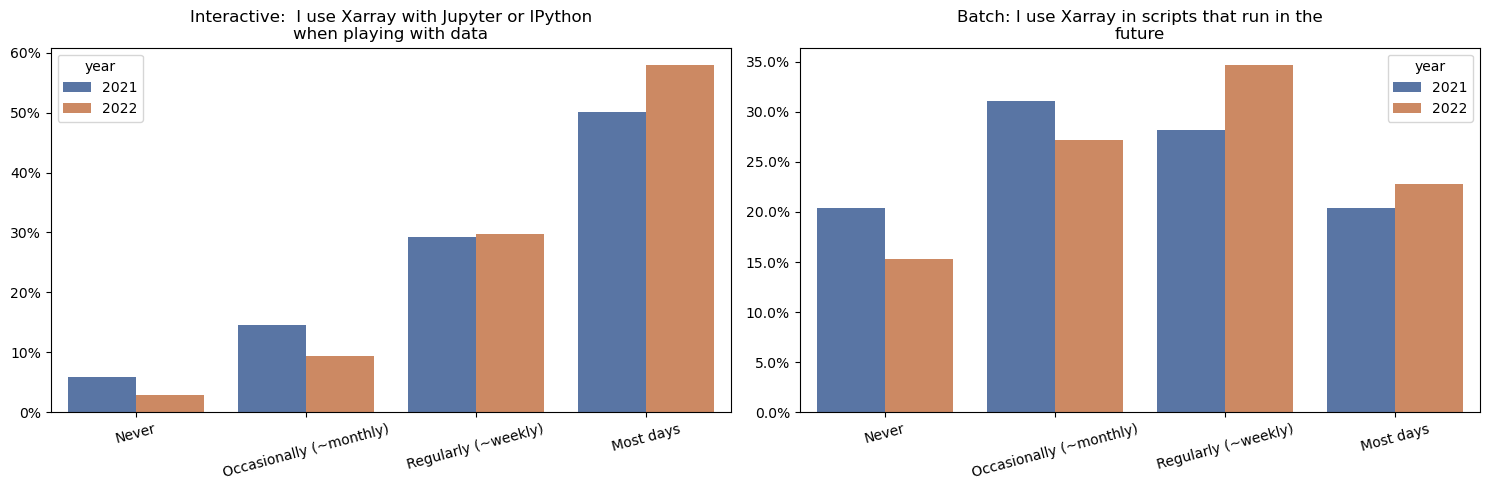

In [14]:
prefix = "Interactive or batch?"

df_q = df.filter(regex=f'^{prefix}',axis=1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    
    data = s.groupby('year').value_counts(normalize=True).mul(100).reset_index(name='counts')

    sns.barplot(y='counts', x=k, data=data, palette="deep", hue='year', ax=ax, order=order)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[len(prefix):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.tick_params(axis='x', rotation=15)
plt.tight_layout()

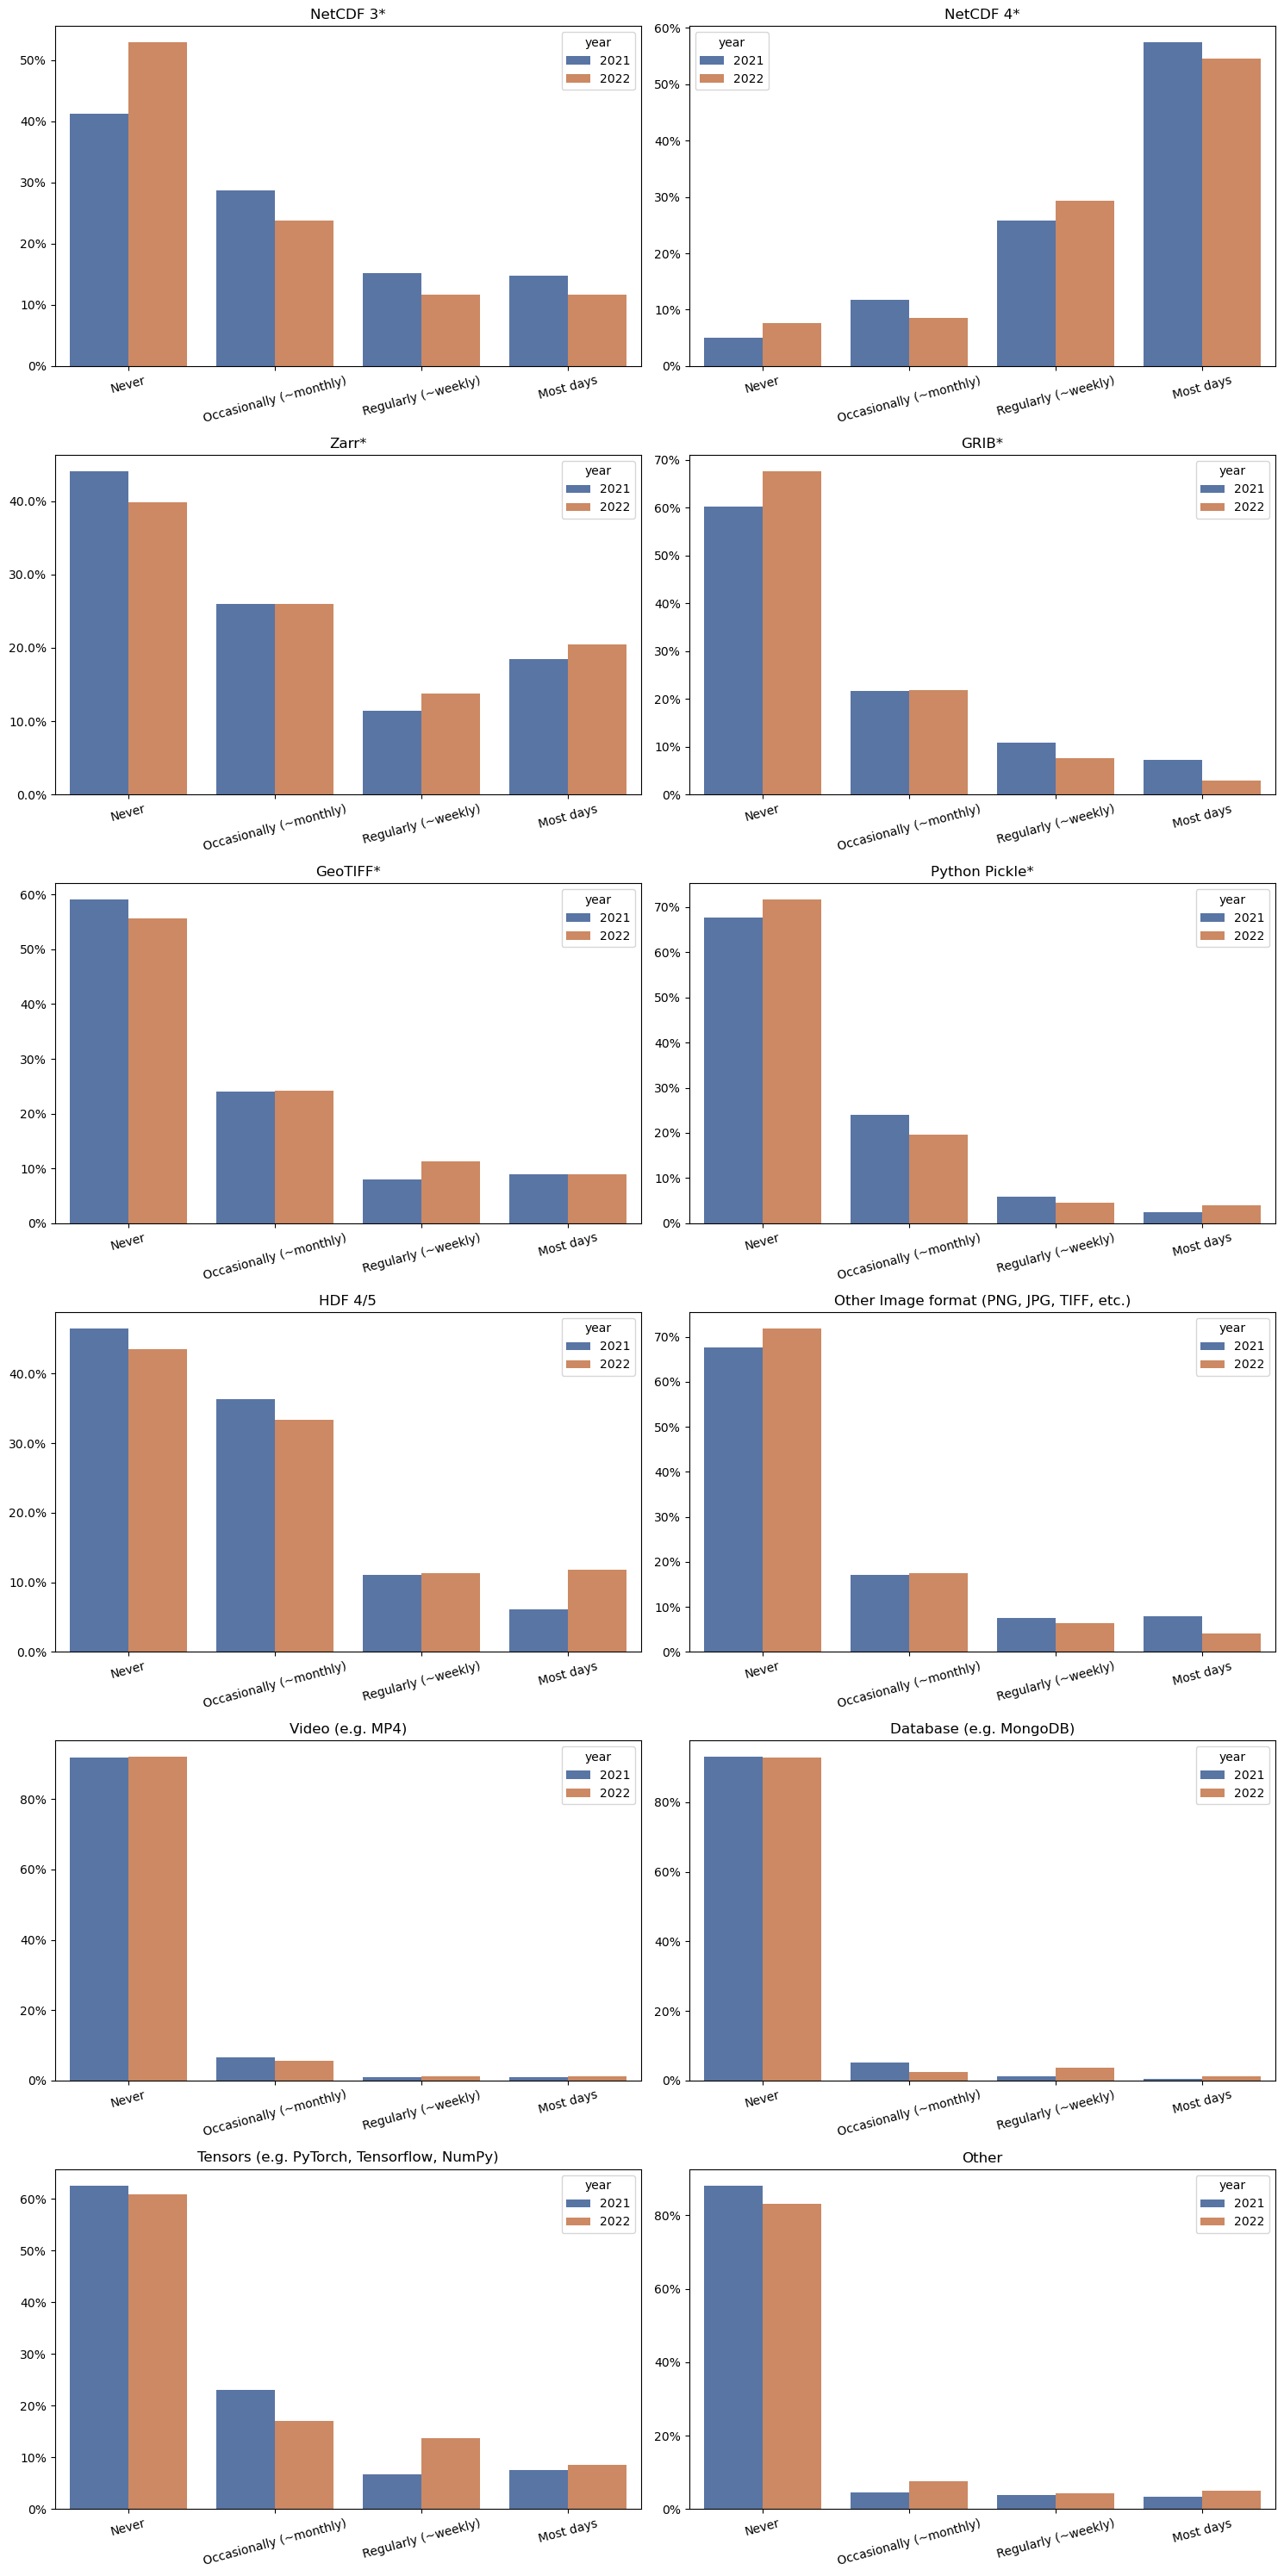

In [15]:
prefix = 'Xarray includes support for reading and writing a number of multi-dimensional data storage formats. Which do you use?'
df_q = df.filter(regex=f'^{prefix}',axis=1)

fig, axes = plt.subplots(6, 2, figsize=(15, 30))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    
    
    data = s.groupby('year').value_counts(normalize=True).mul(100).reset_index(name='counts')

    sns.barplot(y='counts', x=k, data=data, palette="deep", hue='year', ax=ax, order=order)

    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[len(prefix):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.tick_params(axis='x', rotation=15)
plt.tight_layout()


In [16]:
uses_other = df['Xarray includes support for reading and writing a number of multi-dimensional data storage formats. Which do you use? [Other]'].dropna()
uses_other = uses_other[uses_other != 'Never']
other_formats = df['If you answered "Other" above, please list any additional formats:'].dropna()#.reindex(uses_other.index)
print("Other formats:", *other_formats.to_list(), sep="\n — ")

Other formats:
 — I didn't answer "other" but please don't build mongoldb support. thanks.
 — annoying NASA binary formats
 — CSV
 — Text
 — OPeNDAP, CDMRemote (using custom backend)
 — TileDB
 — custom format
 — Feather, CSV
 — Model specific binary data
 — binary
 — ascii file data
 — OpenDap links
 — icartt files
 — Text - for BibTeX & JSON & CSV
 — CDF (via cdflib)
 — Mitgcm binary files (supported through xmitgcm)
 — csv 
 — csv 
 — FITS
 — Raw binary
 — Kerchunk no
 — Parflow binary files
 — FITS format
 — ODIM, CfRadial, Iris/Sigmet, Rainbow, Radolan, Furuno (all weather radar data))
 — other flavors of binary files
 — CSV
 — Other science formats, astrophysics etc.
 — Gridded text files (e.g., https://nsidc.org/data/g02158)
 — weldx (custom implementation) 
 — DBL
 — xmitgcm (MITgcm binary files are chunked)
 — CSV files
 — Very occasionally a .csv
 — Grid ASCII through rioxarray
 — TileDB
 — Segy files
 — Geospatial data via rioxarray
 — JP2


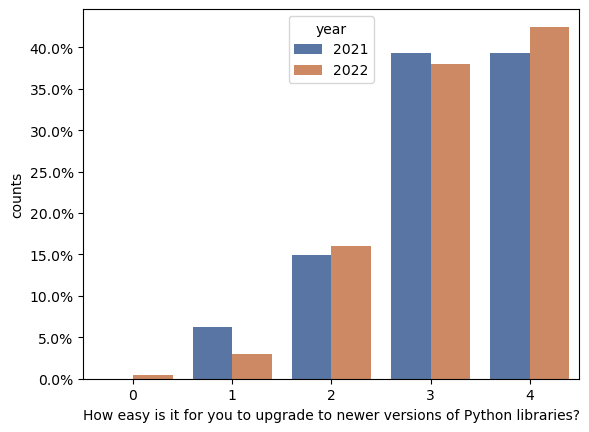

In [17]:
column = 'How easy is it for you to upgrade to newer versions of Python libraries?'
data = df[column].dropna().astype(int).groupby('year').value_counts(normalize=True).mul(100).reset_index(name='counts')

ax = sns.barplot(y='counts', x=column, data=data, palette="deep", hue='year')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

## other libraries used with xarray

In [18]:
from collections import defaultdict

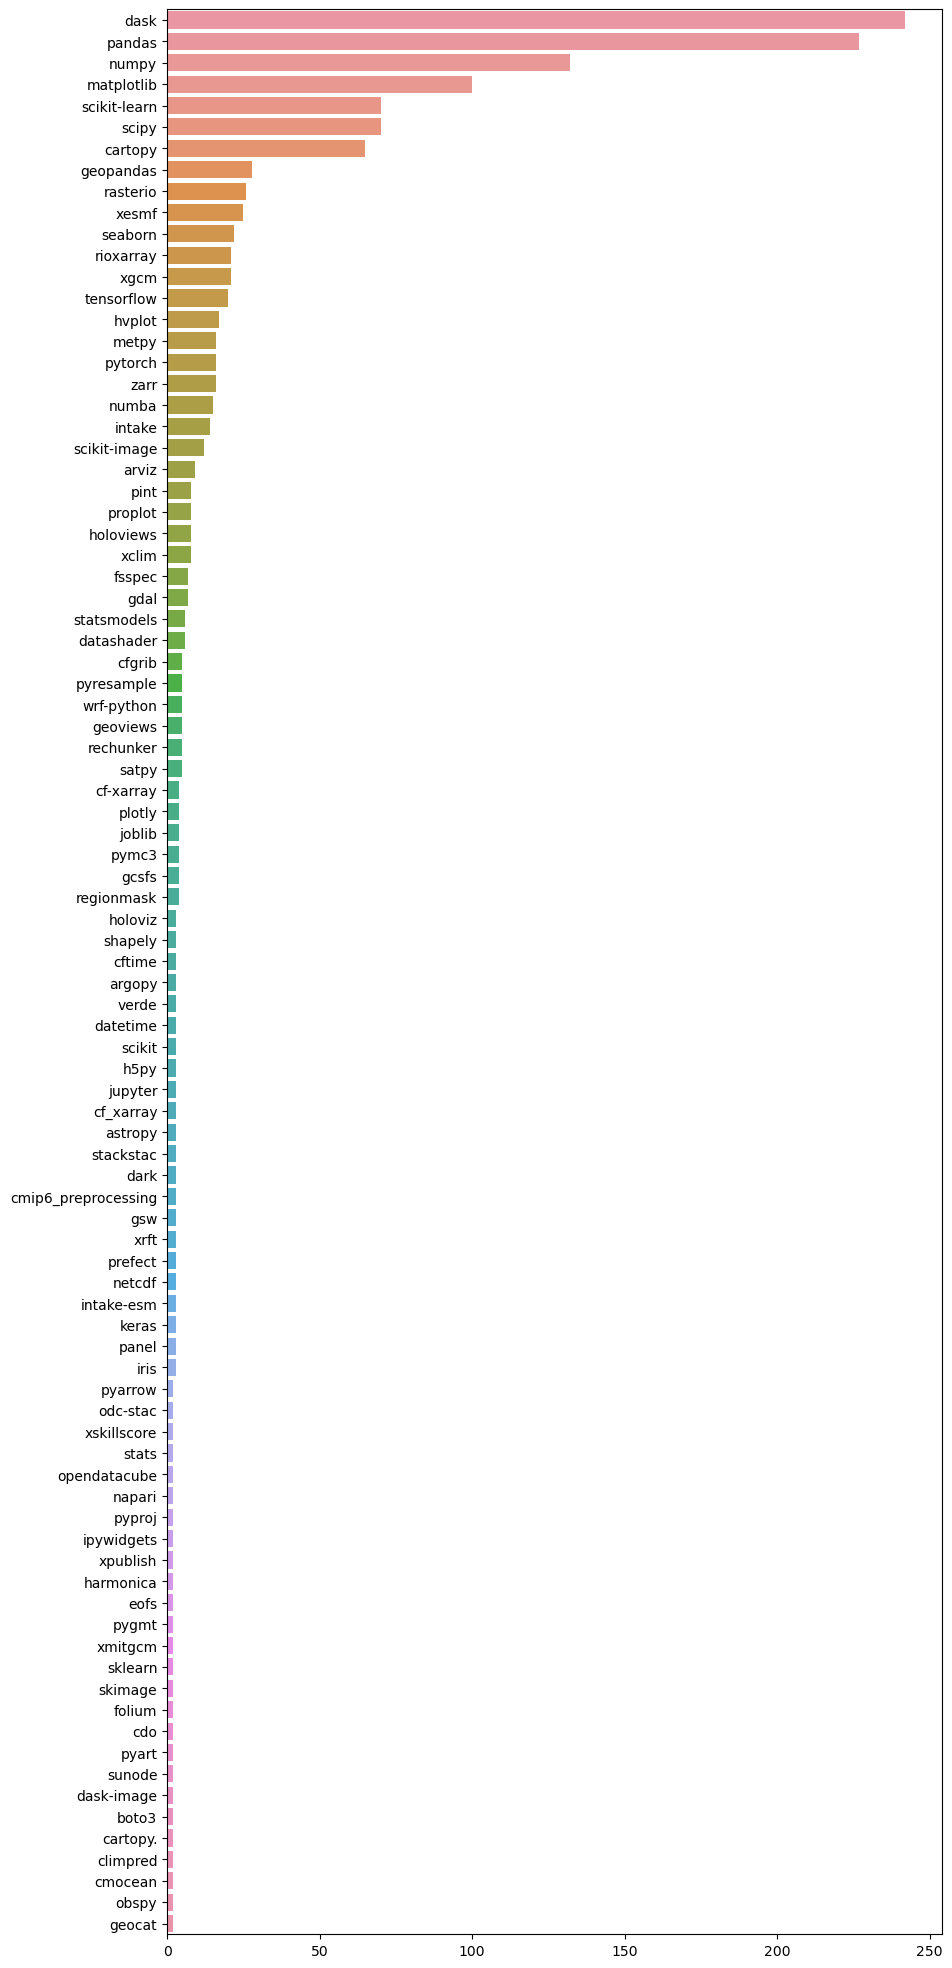

In [19]:
data = df['What are some other libraries that you often use with Xarray? (e.g. "dask, pandas, scikit-learn") ']

preprocessed = (
    data.str.lower().str.replace(r",(?=[^\s])", ", ", regex=True)
    .pipe(split_entries)
    .str.strip("()")
    .str.strip()
)
counts = preprocessed.value_counts()
filtered = counts[counts > 1].rename_axis(index="libraries").reset_index(name="counts")
filtered = filtered[filtered.libraries != ""]

fig = plt.figure(figsize=(10, 25))
ax = fig.gca()
sns.barplot(x="counts", y="libraries", data=filtered, ax=ax)
_ = ax.set_xlabel(None)
_ = ax.set_ylabel(None)

# should we reduce the number of libraries, e.g. by increasing the minimum number of votes?

## most helpful development activities

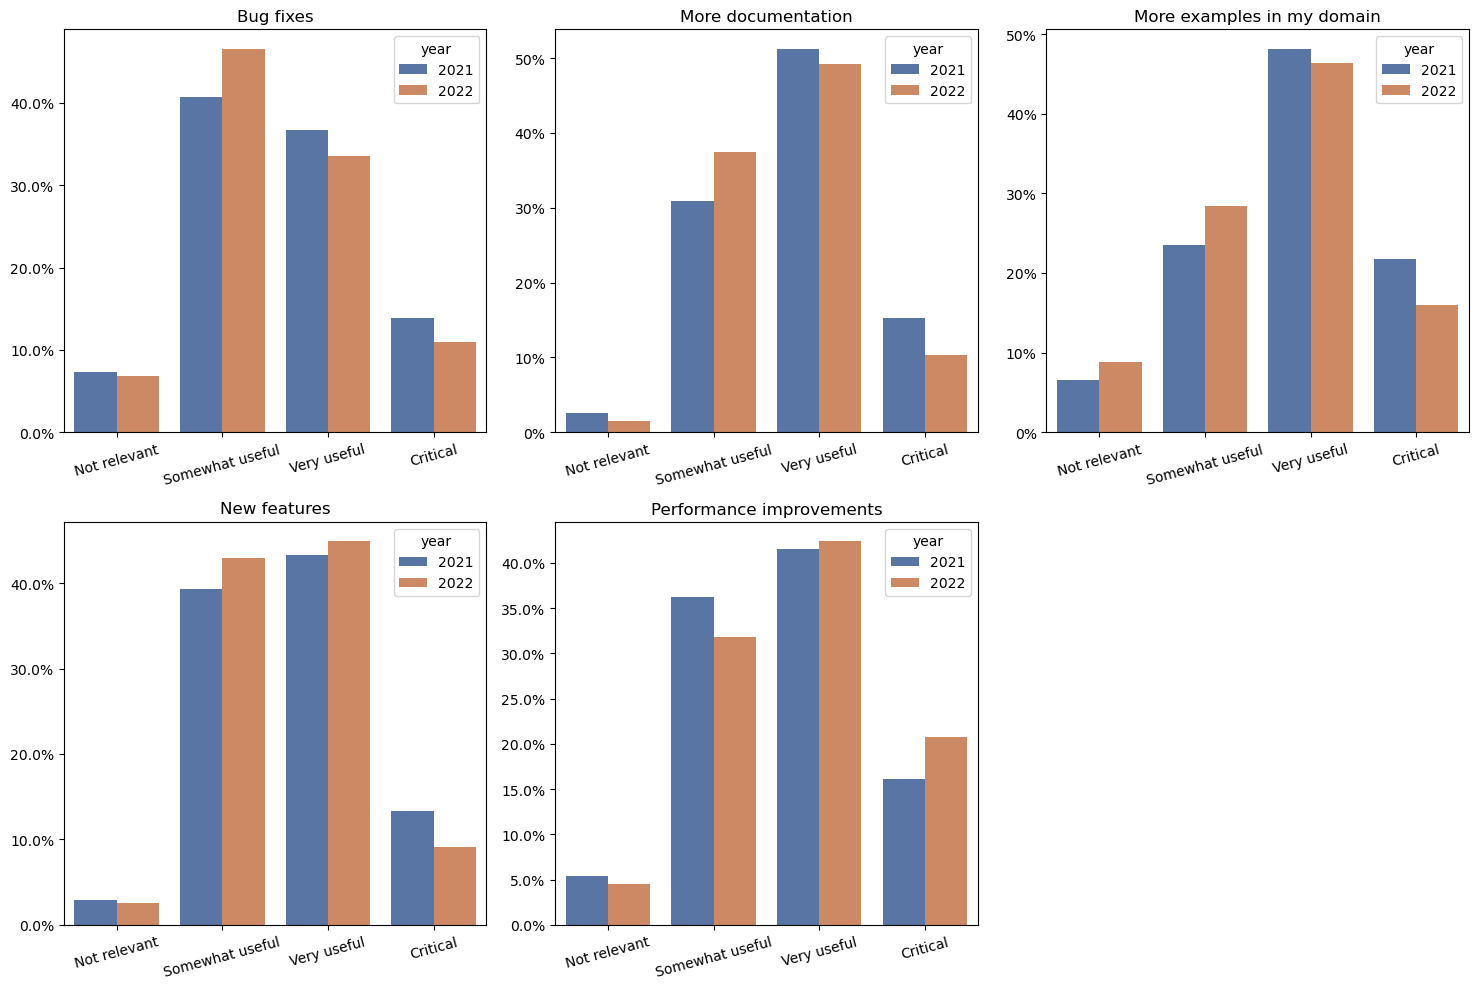

In [20]:
prefix = 'What development activities would help you most right now?'
order = ['Not relevant', 'Somewhat useful', 'Very useful', 'Critical']
df_q = df.filter(regex=f'^{prefix}',axis=1)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    
    data = s.groupby('year').value_counts(normalize=True).mul(100).reset_index(name='counts')
    sns.barplot(y='counts', x=k, data=data, palette="deep", hue='year', ax=ax, order=order)
   
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[len(prefix):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.tick_params(axis='x', rotation=15)
plt.tight_layout()

_ = axes[-1, -1].axis("off")

## most important common feature request

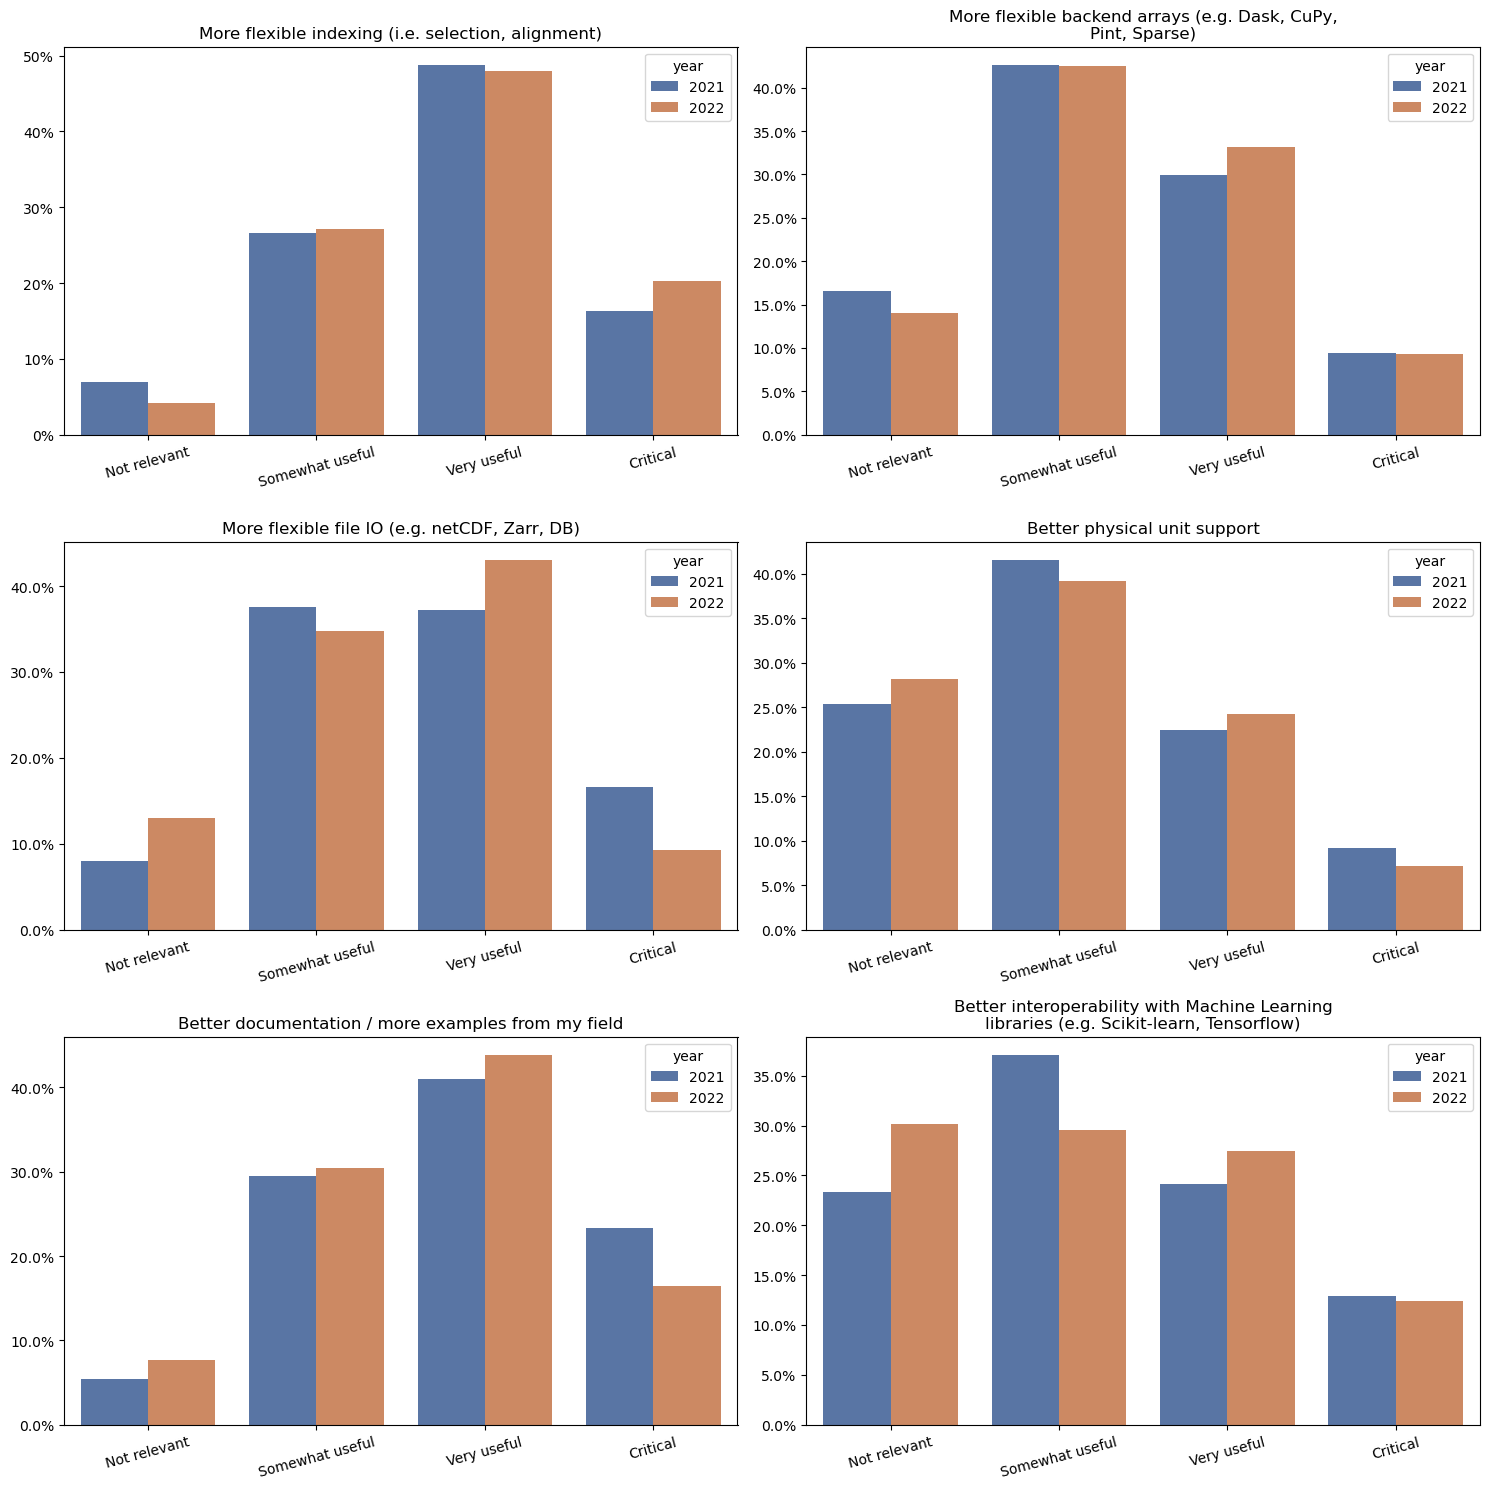

In [21]:
prefix = 'What common feature requests do you care about most?'
order = ['Not relevant', 'Somewhat useful', 'Very useful', 'Critical']
df_q = df.filter(regex=f'^{prefix}',axis=1)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    data = s.groupby('year').value_counts(normalize=True).mul(100).reset_index(name='counts')
    sns.barplot(y='counts', x=k, data=data, palette="deep", hue='year', ax=ax, order=order)
   
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[len(prefix):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.tick_params(axis='x', rotation=15)
plt.tight_layout()

## backend array types

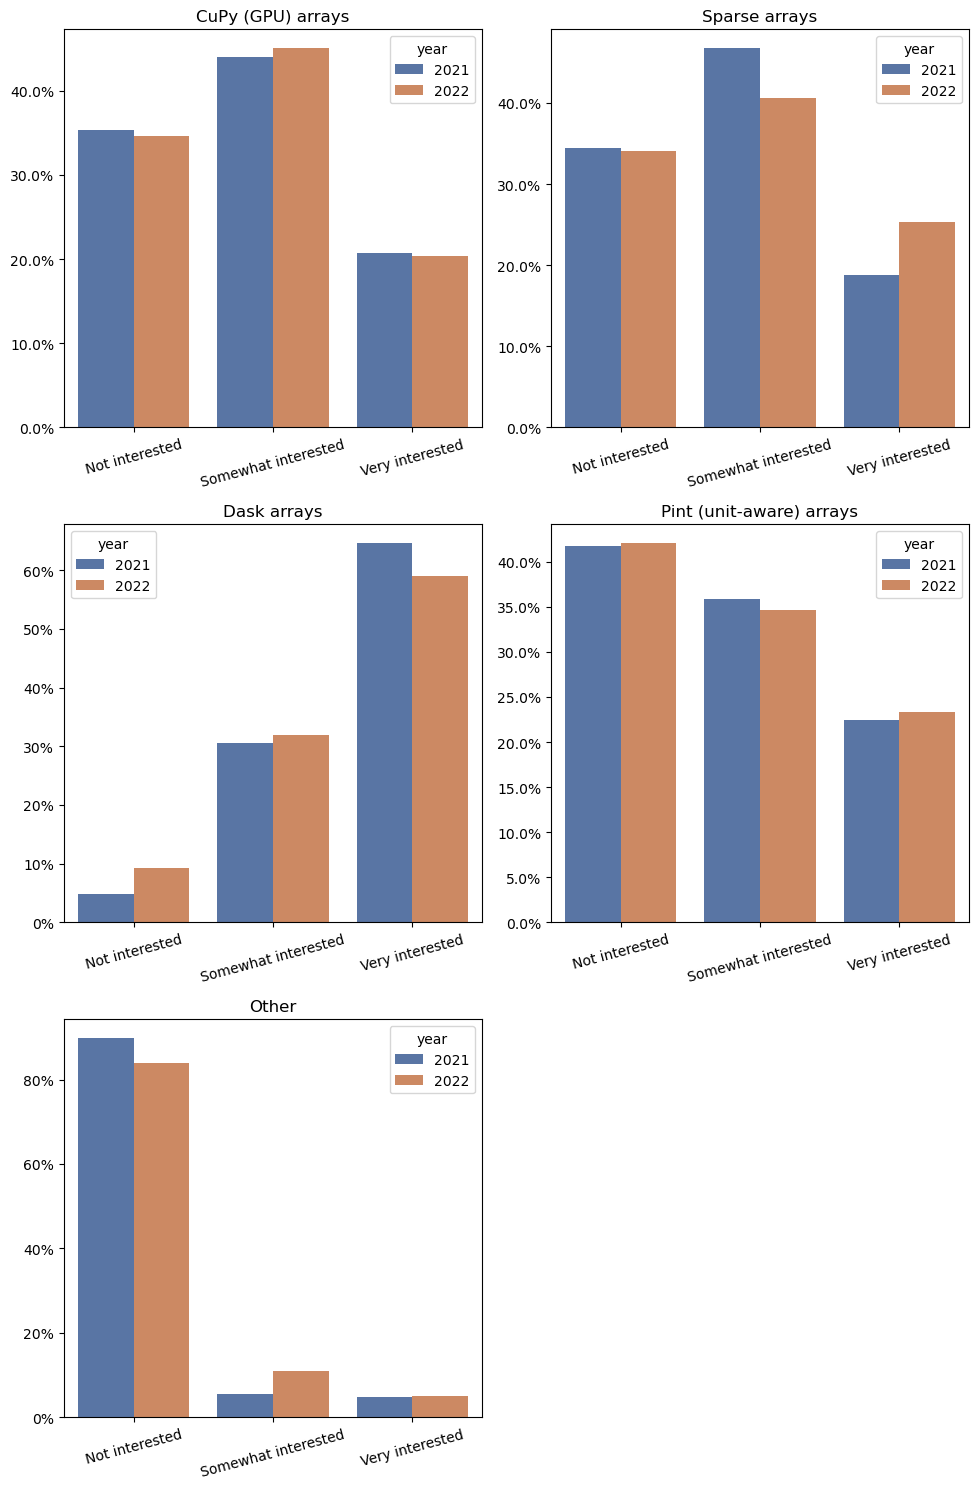

In [22]:
prefix = 'Xarray supports multiple backend array types'
order = ['Not interested', 'Somewhat interested', 'Very interested']
df_q = df.filter(regex=f'^{prefix}',axis=1)

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
    data = s.groupby('year').value_counts(normalize=True).mul(100).reset_index(name='counts')
    sns.barplot(y='counts', x=k, data=data, palette="deep", hue='year', ax=ax, order=order)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[k.find("["):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.tick_params(axis='x', rotation=15)
plt.tight_layout()
_ = axes[-1, -1].axis("off")

In [23]:
uses_other = df['Xarray supports multiple backend array types (e.g. NumPy and Dask). Rank your interest non-NumPy backend array support: [Other]'].dropna()
uses_other = uses_other[uses_other != 'Never']
other = df['If you answered "Other" above, list any additional array types:'].dropna()#.reindex(uses_other.index).dropna()

print("Other array types:", *other.to_list(), sep="\n – ")

Other array types:
 – Video frames
 – Potentiality other number systems like posets?
 – awkward-arrays
 – Jax
 – Using units from astropy (import astropy.units).
 – grib2
 – unyt backed arrays; Pint can be fairly slow
 – Bioformats
 – Jax
 – Point cloud data sets
 – point cloud dataset (e.g.: LAS)
 – Numpy Memmap !  Especially when opening a ZarrStore
 – torch tensors and jax device arrays 
 – awkward arrays
 – Units from Astropy (in astropy.units)
 – Jagged arrays
 – astropy.units.Quantity
 – Ragged arrays
 – jax arrays and pytorch and aesara tensors
 – I suggest to add optional for second name (a more descriptive name) for DataArrays for logging and plot labelling purpose.
 – Pytorch tensors
 – Tensorflow, Pytorch
 – jax
 – Pytorch, Jax


## improvements to the docs

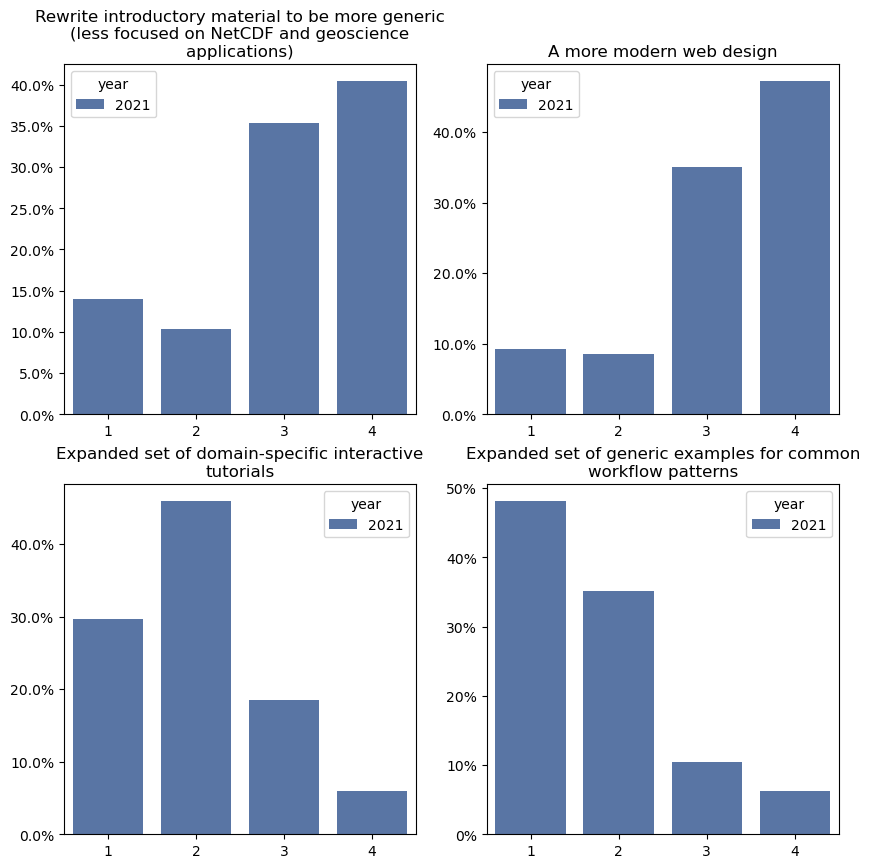

In [24]:
prefix = "Xarray's documentation is due for a makeover. Rank the following set of possible changes based on your personal preferences:"
df_q = df.filter(regex=f'^{prefix}', axis=1)
order = ['1', '2', '3', '4']

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for (k, s), ax in zip(df_q.items(), axes.ravel()):
   
    data = s.str.replace(r"\([^)]+\)", "", regex=True).str.strip().dropna().groupby('year').value_counts(normalize=True).mul(100).reset_index(name='counts')
    sns.barplot(y='counts', x=k, data=data, palette="deep", hue='year', ax=ax, order=order)
    
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    title = "\n".join(textwrap.wrap(
        k[k.find("["):].strip().strip("[]"),
        width=50,
    ))
    ax.set_title(title)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())